In [6]:
import pandas as pd
import os

In [7]:
topic = 'abortion'
scheme = 'NNPred'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_NNtrain.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

#path_nn_model= f'{pathNN}/{topic}/{scheme}'
#os.makedirs(path_nn_model, exist_ok=True)
NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/abortion/NNPred'

In [8]:
train_file

'/media/rinnely/Archer/ENES/Stance/Clasificador/train/labeled_abortion_NNtrain.csv'

In [9]:
train = pd.read_csv(train_file)

In [10]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,NNAgainst,NNFavor,NNPred
0,1344427711742308354,#Abortion will never be approved on our soil!,0,Uknown,0,Uknown,0.987786,0.012214,-1
1,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,0.272192,0.727808,1
2,1344424501006708739,USER USER CULTURE OF LIFE for all #Georgians #...,1,Favor,0,Uknown,0.992035,0.007965,-1
3,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,0.975649,0.024351,-1
4,1344422747607363585,#Argentina became the largest country in #Lati...,0,Uknown,0,Uknown,0.998520,0.001480,-1


In [11]:
train = train[[f'{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [ ]:
train.head()

In [ ]:
train.Label.unique()

In [ ]:
train = train.query('Label != 0')
train.Label.unique()

In [ ]:
train.groupby('Label').count()

In [ ]:
test = pd.read_csv(test_file)
test.head()

In [ ]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

In [ ]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

In [ ]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

In [ ]:
train.shape, test.shape

# clean data

In [48]:
import sys
sys.path.insert(0, '/media/rinnely/Archer/ENES/Stance')
import cleandata as cd

In [ ]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [ ]:
train = train.dropna(axis=0)

# save data

In [ ]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [3]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

In [ ]:
train['Label'].value_counts().plot.pie(legend=True)

In [ ]:
test['Label'].value_counts().plot.pie(legend=True)

In [ ]:
train['Label'].value_counts().plot.bar(legend=True)

In [ ]:
test['Label'].value_counts().plot.bar(legend=True)

In [ ]:
train

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train = train.dropna(axis=0)

In [ ]:
train.info()

# Training

In [4]:
from fastai.text import *

In [5]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.2)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
data_lm.show_batch()

In [6]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=16)

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
data_clas.show_batch()

In [ ]:
f'data_clas{topic}_{scheme}'

In [7]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [ ]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

In [ ]:
#f'{pathNN}/spanish-model/lm-spanish-weights-2'

In [ ]:
#pretrained_model = (f'{pathNN}/spanish-model/lm-spanish-weights-2', f'{pathNN}/spanish-model/spanish-itos-pickle')

In [8]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 5.25E-02


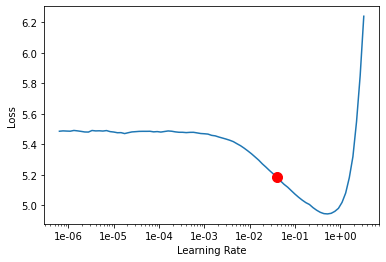

In [9]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [10]:
learn_lm.fit_one_cycle(6,3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.645405,3.817643,0.274533,00:12
1,4.006110,3.602087,0.298093,00:12
2,3.642187,3.564070,0.305702,00:12
3,3.360758,3.542899,0.309416,00:12
4,3.117530,3.523065,0.313413,00:13
5,2.947648,3.517457,0.314570,00:12


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.32E-07


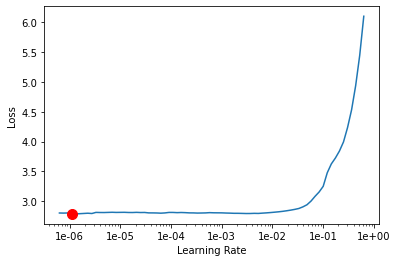

In [11]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [12]:
learn_lm.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,2.790605,3.491641,0.320353,00:19
1,2.708253,3.498202,0.320820,00:20


In [13]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [14]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [15]:
learn_lm.save(f'{topic}_model_v1')

In [16]:
learn_lm.load(f'{topic}_model_v1');

In [17]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [18]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [19]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [20]:
learn.save('learner-1stage')

In [21]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 1.20E-02


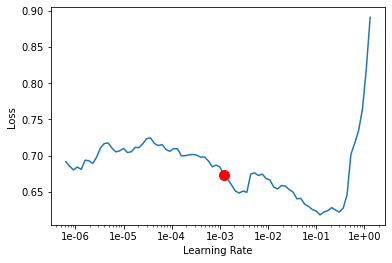

In [22]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [26]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [23]:
learn.fit_one_cycle(5,1e-3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.527943,0.767536,0.560006,00:37
1,0.527864,0.535758,0.633807,00:41
2,0.510221,0.666018,0.601956,00:37
3,0.481627,0.540144,0.643769,00:41
4,0.472074,0.611087,0.618210,00:42


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [24]:
learn.save('learner-2stage')

In [25]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.91E-07


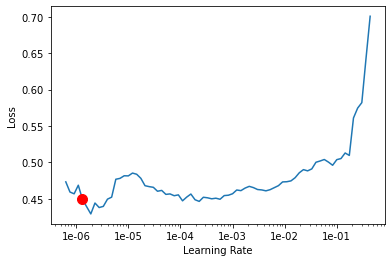

In [26]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,1e-6, moms=(0.8, 0.7))

In [ ]:
learn.save('learner-3stage')

In [ ]:
learn.load('learner-3stage');

In [ ]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-05
Min loss divided by 10: 9.12E-08


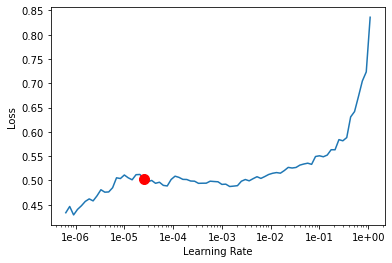

In [27]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(3,9e-7,moms=(0.8, 0.7));

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 1.74E-06


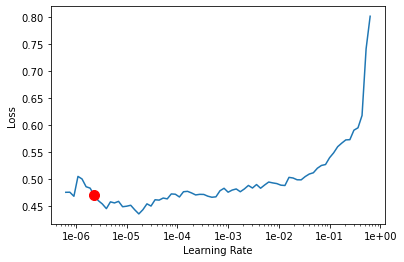

In [28]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [29]:
learn.fit_one_cycle(3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.489057,0.521320,0.629882,00:59
1,0.435337,0.491483,0.666690,01:03
2,0.381849,0.533343,0.657289,01:06


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


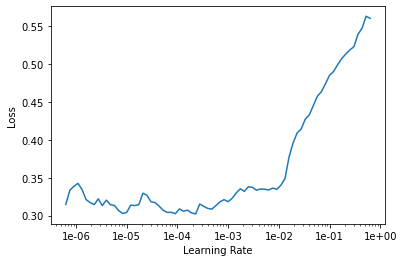

In [30]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [31]:
learn.fit_one_cycle(3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.342332,0.562477,0.647155,01:24
1,0.291380,0.541151,0.653764,01:19
2,0.199122,0.643026,0.648851,01:16


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [33]:
learn.data.classes

[-1, 1]

In [34]:
data = pd.read_csv(train_file)
data.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII
0,1344427711742308354,#Abortion will never be approved on our soil! ...,0,Uknown,0,Uknown
1,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor
2,1344424501006708739,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...,1,Favor,0,Uknown
3,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown
4,1344422747607363585,#Argentina became the largest country in #Lati...,0,Uknown,0,Uknown


In [35]:
data.shape

(5945, 6)

In [37]:
data['NNAgainst'] = ''
data['NNFavor'] = ''
data.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,NNAgainst,NNFavor
0,1344427711742308354,#Abortion will never be approved on our soil! ...,0,Uknown,0,Uknown,,
1,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,,
2,1344424501006708739,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...,1,Favor,0,Uknown,,
3,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,,
4,1344422747607363585,#Argentina became the largest country in #Lati...,0,Uknown,0,Uknown,,


In [49]:
data = cd.cleanData(data.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [116]:
from tqdm.notebook import tqdm, trange
import time 

In [98]:
data[:5].shape[0]

5

In [122]:
for i in trange(data.shape[0]):
    #time.sleep(0.01)
    data.loc[i,'Tweet']
    result = learn.predict(data.loc[i,'Tweet'])
    r = result[2].numpy()
    data.loc[i,'NNAgainst'] = r[0]
    data.loc[i,'NNFavor'] = r[1]

  0%|          | 0/5945 [00:00<?, ?it/s]

In [123]:
data

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,NNAgainst,NNFavor
0,1344427711742308354,#Abortion will never be approved on our soil!,0,Uknown,0,Uknown,0.987786,0.012214
1,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,0.272192,0.727808
2,1344424501006708739,USER USER CULTURE OF LIFE for all #Georgians #...,1,Favor,0,Uknown,0.992035,0.007965
3,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,0.975649,0.024351
4,1344422747607363585,#Argentina became the largest country in #Lati...,0,Uknown,0,Uknown,0.99852,0.00148
...,...,...,...,...,...,...,...,...
5940,1322660042051563520,#ProLife # International pro-life leaders expr...,-1,Against,-1,Against,0.9652,0.0348
5941,1322657154667409409,What drives women to have #abortions? URL,-1,Against,-1,Against,0.574243,0.425757
5942,1322655646978891783,Common excuse: I will vote #ProLife on the res...,-1,Against,-1,Against,0.995725,0.004275
5943,1322643709893267462,"I completely stand with Polands abortion ban, ...",-1,Against,-1,Against,0.996489,0.003511


In [142]:
#lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)
data['NNPred'] = data[['NNFavor','NNAgainst']].apply(lambda x : 1 if x[0] >= 0.70 else( -1 if x[1] >= 0.70 else 0 ),axis=1)

In [143]:
data

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,NNAgainst,NNFavor,NNPred
0,1344427711742308354,#Abortion will never be approved on our soil!,0,Uknown,0,Uknown,0.987786,0.012214,-1
1,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,0.272192,0.727808,1
2,1344424501006708739,USER USER CULTURE OF LIFE for all #Georgians #...,1,Favor,0,Uknown,0.992035,0.007965,-1
3,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,0.975649,0.024351,-1
4,1344422747607363585,#Argentina became the largest country in #Lati...,0,Uknown,0,Uknown,0.99852,0.00148,-1
...,...,...,...,...,...,...,...,...,...
5940,1322660042051563520,#ProLife # International pro-life leaders expr...,-1,Against,-1,Against,0.9652,0.0348,-1
5941,1322657154667409409,What drives women to have #abortions? URL,-1,Against,-1,Against,0.574243,0.425757,0
5942,1322655646978891783,Common excuse: I will vote #ProLife on the res...,-1,Against,-1,Against,0.995725,0.004275,-1
5943,1322643709893267462,"I completely stand with Polands abortion ban, ...",-1,Against,-1,Against,0.996489,0.003511,-1


In [146]:
data.to_csv('/media/rinnely/Archer/ENES/Stance/Clasificador/train/labeled_abortion_NNtrain.csv', index=False)

In [124]:
learn.save('learner-unfreeze')

In [125]:
learn.load('learner-unfreeze');

In [126]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

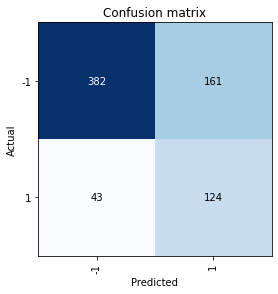

In [127]:
interp.plot_confusion_matrix()

In [ ]:
preds

In [ ]:
learn.save('learner-final')